In [1]:
pip install yfinance matplotlib pandas


In [2]:
pip install yfinance pandas matplotlib seaborn

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


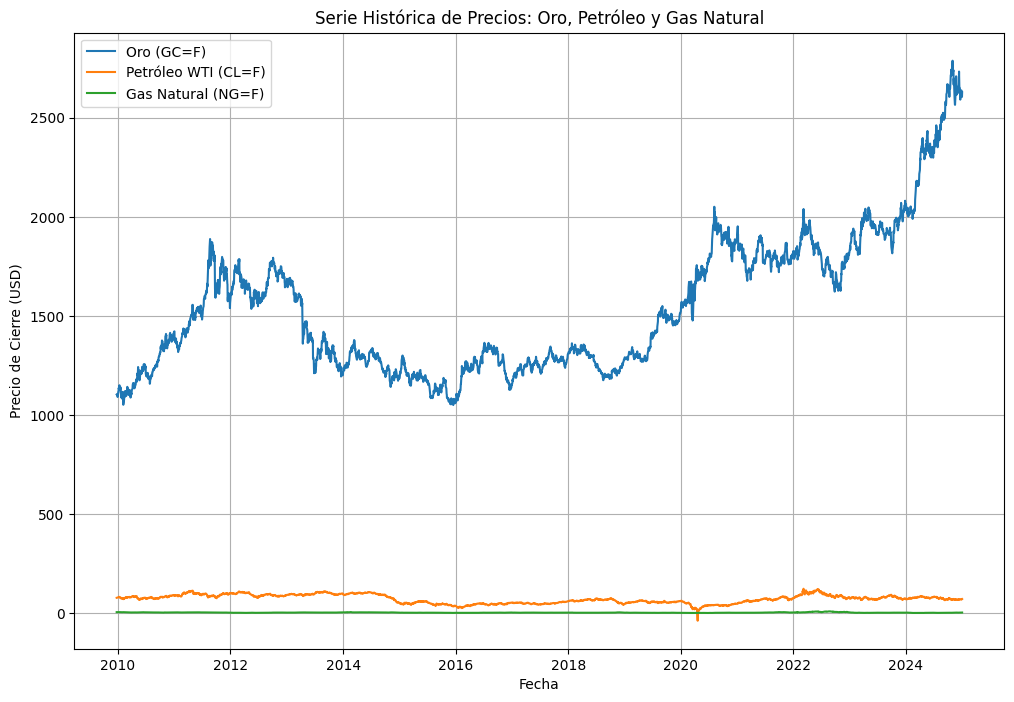

In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

inicio = '2009-12-24'
fin = '2025-01-01'

# Descargar datos desde Yahoo Finance
oro = yf.download('GC=F', start = inicio, end = fin )
petroleo = yf.download('CL=F', start = inicio, end= fin)
gas = yf.download('NG=F', start = inicio, end= fin )

# Resetear el índice para que la fecha se convierta en una columna
oro_reset = oro.reset_index()
petroleo_reset = petroleo.reset_index()
gas_reset = gas.reset_index()

# Guardar los datasets en archivos CSV sin la segunda fila
oro_reset.to_csv('oro.csv', index=False)
petroleo_reset.to_csv('petroleo.csv', index=False)
gas_reset.to_csv('gas.csv', index=False)

# Graficar precios de cierre
plt.figure(figsize=(12, 8))
plt.plot(oro.index, oro['Close'], label='Oro (GC=F)')
plt.plot(petroleo.index, petroleo['Close'], label='Petróleo WTI (CL=F)')
plt.plot(gas.index, gas['Close'], label='Gas Natural (NG=F)')
plt.title('Serie Histórica de Precios: Oro, Petróleo y Gas Natural')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()


| **Columna** | **Descripción** |
|-------------|-----------------|
| **Price**   | Representa el precio que se utilizará como referencia principal en el análisis. |
| **Close**   | Precio de cierre del día ajustado a splits. Es el último precio al que se negoció el oro durante la sesión de mercado correspondiente a esa fecha. |
| **High**    | Precio máximo alcanzado por el contrato de futuros de oro durante la jornada de negociación. |
| **Low**     | Precio mínimo registrado en la sesión de trading de ese día. |
| **Open**    | Precio de apertura del día. Es el primer precio de negociación al inicio del mercado para esa fecha. |
| **Volume**  | Volumen de negociación. Indica la cantidad de contratos de futuros de oro que fueron negociados durante el día. Es un indicador de la liquidez y la actividad del mercado en esa jornada. |

In [4]:
'''import os
os.remove('gas.csv')

os.remove('oro.csv')

os.remove('petroleo.csv')


SyntaxError: incomplete input (<ipython-input-4-ccae5c112e94>, line 1)

In [ ]:
'''import pandas as pd
from google.colab import files
uploaded = files.upload()






In [44]:
import pandas as pd

oro = pd.read_csv('oro.csv', index_col=0, parse_dates=True)
gas = pd.read_csv('gas.csv', index_col=0, parse_dates=True)
petroleo = pd.read_csv('petroleo.csv', index_col=0, parse_dates=True)



In [45]:
# Resetear el índice para que la fecha se convierta en una columna
oro_reset = oro.reset_index()
petroleo_reset = petroleo.reset_index()
gas_reset = gas.reset_index()

# Guardar los datasets con la fecha como columna en los CSV
oro_reset.to_csv('oro.csv', index=False)
petroleo_reset.to_csv('petroleo.csv', index=False)
gas_reset.to_csv('gas.csv', index=False)



In [46]:
import csv

def borrar_fila_csv(nombre_archivo, indice):
    # Leer todas las filas del archivo CSV
    with open(nombre_archivo, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        filas = list(reader)

    # Verificar que el índice exista en el archivo
    if indice < len(filas):
        del filas[indice]
    else:
        print(f"El índice {indice} no existe en {nombre_archivo}")
        return

    # Reescribir el archivo CSV sin la fila eliminada
    with open(nombre_archivo, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(filas)
    print(f"Fila {indice} borrada en {nombre_archivo}")

# Lista de archivos
archivos = ['oro.csv', 'petroleo.csv', 'gas.csv']
indice_a_borrar = 1  # Recuerda: el índice inicia en 0, por lo que 2 es la tercera fila

for archivo in archivos:
    borrar_fila_csv(archivo, indice_a_borrar)

Fila 1 borrada en oro.csv
Fila 1 borrada en petroleo.csv
Fila 1 borrada en gas.csv


In [9]:
# Descargar los archivos
#files.download('oro.csv')
#files.download('petroleo.csv')
#files.download('gas.csv')

In [47]:
import pandas as pd

df = pd.read_csv('gas.csv')
print(df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [48]:
import pandas as pd

def transformar_a_semanal(ruta_archivo, fecha_col='Date'):
    """
    Lee el archivo CSV, convierte la columna de fecha a datetime y la establece como índice.
    Luego, agrupa los datos por semana calculando la media de Price, Close, High, Low y Open,
    y sumando el volumen. El índice resultante serán los lunes de cada semana.
    """
    # Leer el CSV y parsear la columna de fecha
    df = pd.read_csv(ruta_archivo, parse_dates=[fecha_col])

    # Establecer la columna de fecha como índice
    df.set_index(fecha_col, inplace=True)

    # Resamplear por semanas terminando en lunes
    df_semanal = df.resample('W-MON').agg({
        'Close': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Open': 'mean',
        'Volume': 'sum'
    })

    # Ajustar el índice para que sea el lunes de esa semana (ya es lunes por 'W-MON', no hace falta mover)
    return df_semanal

# Transformar cada archivo
gas_semanal = transformar_a_semanal('gas.csv')
petroleo_semanal = transformar_a_semanal('petroleo.csv')
oro_semanal = transformar_a_semanal('oro.csv')

# Guardar resultados
gas_semanal.to_csv('gas_semanal.csv')
petroleo_semanal.to_csv('petroleo_semanal.csv')
oro_semanal.to_csv('oro_semanal.csv')

# Verificación
print(petroleo_semanal.head())
print(gas_semanal.head())
print(oro_semanal.head())


                Close       High        Low       Open   Volume
Date                                                           
2009-12-28  78.410000  78.685001  76.975002  77.254997   211379
2010-01-04  79.755001  80.217501  78.817499  79.092501   677079
2010-01-11  82.575999  83.259999  81.564000  82.357999  1482259
2010-01-18  79.457500  80.669998  78.725000  80.239998  1211452
2010-01-25  76.504001  77.692000  75.490001  76.873997  1447435
              Close     High      Low     Open  Volume
Date                                                  
2009-12-28  5.81650  5.96600  5.67600  5.79800  106856
2010-01-04  5.74475  5.93275  5.67125  5.80975  249225
2010-01-11  5.73100  5.90380  5.60400  5.79260  597160
2010-01-18  5.65075  5.73150  5.44700  5.60350  534517
2010-01-25  5.64180  5.75420  5.54180  5.64020  527501
                  Close         High          Low         Open  Volume
Date                                                                  
2009-12-28  1105.649963  

In [58]:
def transformar_a_semanal_con_curtosis_volatilidad_retornos(ruta_archivo, fecha_col='Date'):
    """
    Lee el archivo CSV, convierte la columna de fecha a datetime y la establece como índice.
    Luego, agrupa los datos por semana calculando:
      - Media de Close, High, Low y Open.
      - Suma de Volume.
      - Curtosis de los cierres diarios (Close) dentro de cada semana.
      - Volatilidad: desviación estándar de los retornos diarios de Close dentro de cada semana.
      - Return_Sum_Week: suma de los retornos logarítmicos diarios de Close (retorno logarítmico semanal).
    El índice resultante serán los lunes de cada semana.
    """
    # 1. Leer el CSV y parsear la columna de fecha
    df = pd.read_csv(ruta_archivo, parse_dates=[fecha_col])
    df.set_index(fecha_col, inplace=True)
    df.sort_index(inplace=True)

    # 2. Calcular retornos logarítmicos diarios de Close
    df['Return_Close'] = np.log(df['Close'] / df['Close'].shift(1))
    df.dropna(subset=['Return_Close'], inplace=True)

    # 3. Hacer resample semanal “W-MON” (semana terminando lunes)
    df_semanal = df.resample('W-MON').agg({
        'Close': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Open': 'mean',
        'Volume': 'sum'
    })

    # 4. Calcular Curtosis, Volatilidad y Return_Sum_Week (igual que antes)
    df_semanal['Kurtosis_Close'] = df['Close'].resample('W-MON').agg(pd.Series.kurtosis)
    df_semanal['Volatilidad_Return_Close'] = df['Return_Close'].resample('W-MON').agg(lambda x: x.std(ddof=1))
    df_semanal['Return_Sum_Week'] = df['Return_Close'].resample('W-MON').agg(lambda x: x.sum())



    # 5. Calcular la volatilidad: desviación estándar de los retornos diarios de Close por semana
    volatilidad_semana = df['Return_Close'].resample('W-MON').agg(lambda x: x.std(ddof=1))
    df_semanal['Volatilidad_Return_Close'] = volatilidad_semana

    # 6. Calcular Return_Sum_Week: suma de los retornos logarítmicos diarios de Close por semana
    return_sum_week = df['Return_Close'].resample('W-MON').agg(lambda x: x.sum())
    df_semanal['Return_Sum_Week'] = return_sum_week

    return df_semanal

# Transformar cada archivo incluyendo curtosis, volatilidad y Return_Sum_Week de Close semanal
gas_semanal      = transformar_a_semanal_con_curtosis_volatilidad_retornos('gas.csv')
petroleo_semanal = transformar_a_semanal_con_curtosis_volatilidad_retornos('petroleo.csv')
oro_semanal      = transformar_a_semanal_con_curtosis_volatilidad_retornos('oro.csv')

# Guardar resultados
gas_semanal.to_csv('gas_semanal_con_todas_vars.csv')
petroleo_semanal.to_csv('petroleo_semanal_con_todas_vars.csv')
oro_semanal.to_csv('oro_semanal_con_todas_vars.csv')

# Verificación
print("Petróleo Semanal con Curtosis, Volatilidad y Return_Sum_Week:\n", petroleo_semanal.head())
print("\nGas Semanal con Curtosis, Volatilidad y Return_Sum_Week:\n", gas_semanal.head())
print("\nOro Semanal con Curtosis, Volatilidad y Return_Sum_Week:\n", oro_semanal.head())

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Petróleo Semanal con Curtosis, Volatilidad y Return_Sum_Week:
                 Close       High        Low       Open   Volume  \
Date                                                              
2009-12-28  78.769997  79.120003  77.760002  77.919998   108895   
2010-01-04  79.755001  80.217501  78.817499  79.092501   677079   
2010-01-11  82.575999  83.259999  81.564000  82.357999  1482259   
2010-01-18  79.457500  80.669998  78.725000  80.239998  1211452   
2010-01-25  76.504001  77.692000  75.490001  76.873997  1447435   

            Kurtosis_Close  Volatilidad_Return_Close  Return_Sum_Week  
Date                                                                   
2009-12-28             NaN                       NaN         0.009182  
2010-01-04        3.440702                  0.012272         0.034194  
2010-01-11        1.993985                  0.008949         0.012315  
2010-01-18        1.305068                  0.007751        -0.056332  
2010-01-25       -1.195014         

In [14]:
#import pandas as pd

'''def transformar_a_semanal(ruta_archivo, fecha_col='Date'):
    """
    Lee el archivo CSV, convierte la columna de fecha a datetime y la establece como índice.
    Luego, agrupa los datos por semana calculando la media de Price, Close, High, Low y Open,
    y sumando el volumen.
    """
    # Leer el CSV y parsear la columna de fecha
    df = pd.read_csv(ruta_archivo, parse_dates=[fecha_col])

    # Establecer la columna de fecha como índice
    df.set_index(fecha_col, inplace=True)

    # Agregar los datos a nivel semanal
    df_semanal = df.resample('W').agg({
        'Close': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Open': 'mean',
        'Volume': 'sum'
    })

    return df_semanal

# Transformar cada archivo
gas_semanal = transformar_a_semanal('gas.csv')
petroleo_semanal = transformar_a_semanal('petroleo.csv')
oro_semanal = transformar_a_semanal('oro.csv')

# (Opcional) Guardar los resultados en nuevos CSV
gas_semanal.to_csv('gas_semanal.csv')
petroleo_semanal.to_csv('petroleo_semanal.csv')
oro_semanal.to_csv('oro_semanal.csv')

# Mostrar las primeras filas de uno de los DataFrames resultantes para verificar la transformación
print(petroleo_semanal.head())
print(gas_semanal.head())
print(oro_semanal.head())


SyntaxError: incomplete input (<ipython-input-14-c93511278bf1>, line 3)

In [59]:
# Guardar los datasets en archivos CSV con la fecha semanal como columna
oro_semanal.reset_index().to_csv('oro_semanal.csv', index=False)
petroleo_semanal.reset_index().to_csv('petroleo_semanal.csv', index=False)
gas_semanal.reset_index().to_csv('gas_semanal.csv', index=False)

# Descargar los archivos (solo funciona en Google Colab)
from google.colab import files

#files.download('oro_semanal.csv')
#files.download('petroleo_semanal.csv')
#files.download('gas_semanal.csv')


In [60]:
import pandas as pd

# Cargar los CSV y convertir la columna "Date" a datetime
oro = pd.read_csv('oro_semanal.csv', parse_dates=['Date'])
petroleo = pd.read_csv('petroleo_semanal.csv', parse_dates=['Date'])
gas = pd.read_csv('gas_semanal.csv', parse_dates=['Date'])

# Verificar que las fechas sean idénticas
if oro['Date'].equals(petroleo['Date']) and oro['Date'].equals(gas['Date']):
    print("Las fechas de todos los archivos son idénticas.")
else:
    print("Las fechas difieren entre los archivos. Se realizará un merge con las fechas en común.")

# Aquí se asume que previamente ya calculaste la variación y la agregaste
# Renombrar las columnas (excepto Date) para identificar cada dataset
oro = oro.rename(columns=lambda x: x if x == 'Date' else f"{x}_gold")
petroleo = petroleo.rename(columns=lambda x: x if x == 'Date' else f"{x}_oil")
gas = gas.rename(columns=lambda x: x if x == 'Date' else f"{x}_gas")

# Realizar el merge (unión) de los tres DataFrames por "Date"
df_merged = oro.merge(petroleo, on='Date', how='inner').merge(gas, on='Date', how='inner')

# Mostrar las primeras filas del DataFrame combinado
print("Primeras filas del DataFrame combinado:")
print(df_merged.head())

# Guardar el DataFrame combinado en un nuevo CSV
df_merged = df_merged.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, float) else x)
df_merged.to_csv('merged_data.csv', index=False, sep=';')




Las fechas de todos los archivos son idénticas.
Primeras filas del DataFrame combinado:
        Date   Close_gold    High_gold     Low_gold    Open_gold  Volume_gold  \
0 2009-12-28  1107.199951  1111.900024  1102.800049  1107.199951          350   
1 2010-01-04  1100.349976  1107.674988  1093.524994  1100.349976         1770   
2 2010-01-11  1135.199976  1139.639966  1126.119971  1135.199976          703   
3 2010-01-18  1134.500000  1143.225006  1127.049988  1133.775024          240   
4 2010-01-25  1107.819971  1114.159985  1101.739990  1110.019971          215   

   Kurtosis_Close_gold  Volatilidad_Return_Close_gold  Return_Sum_Week_gold  \
0                  NaN                            NaN              0.002804   
1             3.327326                       0.013085              0.009439   
2             1.595653                       0.007514              0.029097   
3            -1.663296                       0.012632             -0.018064   
4             1.588350        

<ipython-input-60-c0a41fef0836>:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged = df_merged.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, float) else x)


In [62]:
import pandas as pd

# Cargar el CSV combinado con separador punto y coma
df_merged = pd.read_csv('merged_data.csv', sep=';', parse_dates=['Date'], dayfirst=False)

# Eliminar la fila con Date == 2009-12-28
df_merged = df_merged[df_merged['Date'] != pd.to_datetime('2009-12-28')]

print(df_merged.head())

df_merged.to_csv('merged_data_sin_2009-12-28.csv', index=False, sep=';')


        Date          Close_gold           High_gold            Low_gold  \
1 2010-01-04  1100,3499755859375  1107,6749877929688  1093,5249938964844   
2 2010-01-11  1135,1999755859374  1139,6399658203125   1126,119970703125   
3 2010-01-18              1134,5  1143,2250061035156  1127,0499877929688   
4 2010-01-25   1107,819970703125  1114,1599853515625   1101,739990234375   
5 2010-02-01  1090,6400146484375    1095,22001953125   1081,360009765625   

            Open_gold  Volume_gold  Kurtosis_Close_gold  \
1  1100,3499755859375         1770   3,3273260381008427   
2  1135,1999755859374          703    1,595652922306849   
3  1133,7750244140625          240  -1,6632963835709536   
4   1110,019970703125          215     1,58835002645427   
5    1087,22001953125       321774  -1,9682293127962296   

  Volatilidad_Return_Close_gold Return_Sum_Week_gold          Close_oil  ...  \
1            0,0130850149681937    0,009438696942454  79,75500106811523  ...   
2             0,007513650296

In [17]:
'''from google.colab import files
files.download('merged_data.csv')


SyntaxError: incomplete input (<ipython-input-17-6fd10bc798bd>, line 1)

In [64]:
import pandas as pd
import numpy as np

# 1. Cargar los CSV semanales ya existentes (agregados) y convertir "Date" a datetime
oro_semanal   = pd.read_csv('oro_semanal.csv', parse_dates=['Date']).rename(
    columns=lambda x: x if x == 'Date' else f"{x}_gold"
)
petro_semanal = pd.read_csv('petroleo_semanal.csv', parse_dates=['Date']).rename(
    columns=lambda x: x if x == 'Date' else f"{x}_oil"
)
gas_semanal    = pd.read_csv('gas_semanal.csv', parse_dates=['Date']).rename(
    columns=lambda x: x if x == 'Date' else f"{x}_gas"
)

# 2. Merge de los tres DataFrames semanales agregados
df_merged = (
    oro_semanal
    .merge(petro_semanal, on='Date', how='inner')
    .merge(gas_semanal, on='Date', how='inner')
)

# 3. Crear columnas normalizadas (base = primer valor semanal) para Close
df_merged['close_gold_norm'] = df_merged['Close_gold'] / df_merged['Close_gold'].iloc[0]
df_merged['close_oil_norm']  = df_merged['Close_oil']  / df_merged['Close_oil'].iloc[0]
df_merged['close_gas_norm']  = df_merged['Close_gas']  / df_merged['Close_gas'].iloc[0]

# 4. Construir un DataFrame inicial con normalizados y volumen
df_norm_vol = df_merged[[
    'Date',
    'close_gold_norm', 'Volume_gold',
    'close_oil_norm',  'Volume_oil',
    'close_gas_norm',  'Volume_gas'
]].copy()

# 5. Cargar los CSV diarios originales para calcular métricas intrasemanales
#    (se espera que existan archivos 'oro.csv', 'petroleo.csv' y 'gas.csv' con datos diarios)
oro_diario   = pd.read_csv('oro.csv', parse_dates=['Date']).set_index('Date').sort_index()
petro_diario = pd.read_csv('petroleo.csv', parse_dates=['Date']).set_index('Date').sort_index()
gas_diario   = pd.read_csv('gas.csv', parse_dates=['Date']).set_index('Date').sort_index()

# 6. Función auxiliar para métricas semanales intrasemanales
def calcular_metrica_intrasemanal(df_diario, columna_close):
    """
    Recibe un DataFrame diario indexado por fecha y el nombre de la columna 'Close'.
    Devuelve tres Series:
      - return_sum: suma de retornos log diarios (return_sum_week) por semana (índice = lunes).
      - vol_week: desviación estándar (volatilidad) de retornos diarios por semana.
      - kurt_week: curtosis de retornos diarios por semana.
    """
    # 6.1. Calcular retornos logarítmicos diarios
    df_diario['Return_Close'] = np.log(df_diario[columna_close] / df_diario[columna_close].shift(1))
    df_diario.dropna(subset=['Return_Close'], inplace=True)

    # 6.2. Resamplear por semana con etiqueta lunes (W-MON)
    return_sum = df_diario['Return_Close'].resample('W-MON').agg(lambda x: x.sum())
    vol_week   = df_diario['Return_Close'].resample('W-MON').agg(lambda x: x.std(ddof=1))
    kurt_week  = df_diario['Return_Close'].resample('W-MON').agg(lambda x: pd.Series(x).kurtosis())

    return return_sum, vol_week, kurt_week

# 7. Calcular métricas semanales intrasemanales para cada activo
rs_gold, vol_gold, kurt_gold = calcular_metrica_intrasemanal(oro_diario,   'Close')
rs_oil,  vol_oil,  kurt_oil  = calcular_metrica_intrasemanal(petro_diario, 'Close')
rs_gas,  vol_gas,  kurt_gas  = calcular_metrica_intrasemanal(gas_diario,   'Close')

# 8. Montar DataFrame único de métricas semanales intrasemanales
df_metrics = pd.DataFrame({
    'Date':               rs_gold.index,
    'returnsumweek_gold': rs_gold.values,
    'volatilidad_gold':   vol_gold.values,
    'kurtosis_gold':      kurt_gold.values,
    'returnsumweek_oil':  rs_oil.values,
    'volatilidad_oil':    vol_oil.values,
    'kurtosis_oil':       kurt_oil.values,
    'returnsumweek_gas':  rs_gas.values,
    'volatilidad_gas':    vol_gas.values,
    'kurtosis_gas':       kurt_gas.values,
}).set_index('Date')

# 9. Generar un índice semanal completo (etiqueta: lunes) desde la primera fecha de df_norm_vol
first_monday = df_norm_vol['Date'].min()  # debería ser el lunes inicial esperado (2010-01-04)
last_monday  = df_norm_vol['Date'].max()
weekly_index = pd.date_range(start=first_monday, end=last_monday, freq='W-MON')

# 10. Reindexar df_norm_vol y df_metrics para asegurar que incluyen 2010-01-04
df_norm_vol_reindexed = (
    df_norm_vol
    .set_index('Date')
    .reindex(weekly_index)   # fuerza la presencia de todos los lunes desde 2010-01-04
)
df_metrics_reindexed = df_metrics.reindex(weekly_index)

# 11. Unir las métricas intrasemanales al DataFrame reindexado de normalizados y volumen
df_final = df_norm_vol_reindexed.join(df_metrics_reindexed, how='left').reset_index()
df_final.rename(columns={'index': 'Date'}, inplace=True)

# 12. Reordenar columnas para agrupar por materia prima y mantener consistencia en nombres
df_final = df_final[[
    'Date',
    # Oro
    'close_gold_norm', 'Volume_gold',
    'returnsumweek_gold', 'volatilidad_gold', 'kurtosis_gold',
    # Petróleo
    'close_oil_norm', 'Volume_oil',
    'returnsumweek_oil', 'volatilidad_oil', 'kurtosis_oil',
    # Gas
    'close_gas_norm', 'Volume_gas',
    'returnsumweek_gas', 'volatilidad_gas', 'kurtosis_gas'
]]

# 13. Mostrar el DataFrame final organizado
print("DataFrame organizado por materia prima (incluye 2010-01-04):")
print(df_final.head())

# 14. Guardar a CSV
df_final.to_csv('normalizados_volumen_metr_intrasemanal_organizado.csv', index=False)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


DataFrame organizado por materia prima (incluye 2010-01-04):
        Date  close_gold_norm  Volume_gold  returnsumweek_gold  \
0 2009-12-28         1.000000          350            0.002804   
1 2010-01-04         0.993813         1770            0.009439   
2 2010-01-11         1.025289          703            0.029097   
3 2010-01-18         1.024657          240           -0.018064   
4 2010-01-25         1.000560          215           -0.031369   

   volatilidad_gold  kurtosis_gold  close_oil_norm  Volume_oil  \
0               NaN            NaN        1.000000      108895   
1          0.013085       0.781510        1.012505      677079   
2          0.007514      -1.650715        1.048318     1482259   
3          0.012632      -4.001650        1.008728     1211452   
4          0.013454      -1.358517        0.971233     1447435   

   returnsumweek_oil  volatilidad_oil  kurtosis_oil  close_gas_norm  \
0           0.009182              NaN           NaN        1.000000   
1  

In [95]:
import pandas as pd

df = pd.read_csv('normalizados_volumen_metr_intrasemanal_organizado.csv', parse_dates=['Date'])
df = df[df['Date'] != pd.to_datetime('2009-12-28')]
df.to_csv('normalizados_volumen_metr_intrasemanal_organizado.csv', index=False)


In [102]:
from google.colab import files
files.download('normalizados_volumen_metr_intrasemanal_organizado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
from google.colab import files
uploaded = files.upload()



Saving weekly_data.csv to weekly_data (3).csv


In [98]:
import pandas as pd

# Leer el archivo CSV correctamente
dfgprc = pd.read_csv('weekly_data.csv')

# Verificar que se cargó correctamente
print(dfgprc.head())




         week  GPRC_ARG  GPRC_AUS  GPRC_BEL  GPRC_BRA  GPRC_CAN  GPRC_CHN  \
0  2010-01-04  0.018485  0.040667  0.018485  0.062849  0.188547  0.366002   
1  2010-01-11  0.018485  0.040667  0.018485  0.062849  0.188547  0.366002   
2  2010-01-18  0.018485  0.040667  0.018485  0.062849  0.188547  0.366002   
3  2010-01-25  0.018485  0.040667  0.018485  0.062849  0.188547  0.366002   
4  2010-02-01  0.065538  0.047333  0.047333  0.061897  0.138358  0.509740   

   GPRC_DEU  GPRC_DNK  GPRC_ESP  ...  GEPU_SCMP China  GEPU_Mainland China  \
0  0.195941  0.081334  0.033273  ...        95.782084           119.162039   
1  0.195941  0.081334  0.033273  ...        95.782084           119.162039   
2  0.195941  0.081334  0.033273  ...        95.782084           119.162039   
3  0.195941  0.081334  0.033273  ...        95.782084           119.162039   
4  0.265793  0.061897  0.061897  ...       103.444367           106.049458   

   GEPU_Sweden  GEPU_Mexico  OPEP_sanction_active  num_sanctions  \


In [99]:
# Asegurarse de que ambas columnas sean datetime
df_final['Date'] = pd.to_datetime(df_norm_vol['Date'])
dfgprc['week'] = pd.to_datetime(dfgprc['week'])


In [103]:
import pandas as pd
import numpy as np

# Cargar ambos archivos
df_norm = pd.read_csv('normalizados_volumen_metr_intrasemanal_organizado.csv', parse_dates=['Date'])
df_week = pd.read_csv('weekly_data.csv', parse_dates=['week'])

# Asegurarse de que las series de fechas estén ordenadas y sin duplicados inesperados
df_norm = df_norm.sort_values('Date').reset_index(drop=True)
df_week = df_week.sort_values('week').reset_index(drop=True)

# Verificar dtypes y primeros valores
print("dtype df_norm['Date']:", df_norm['Date'].dtype)
print("dtype df_week['week']:", df_week['week'].dtype)
print("\nPrimeras fechas de df_norm:\n", df_norm['Date'].head(10))
print("\nPrimeras fechas de df_week:\n", df_week['week'].head(10))

# Si se comparan las primeras 783 fechas (índices 0 a 782)
n = 783
fechas_norm = df_norm['Date'].iloc[:n].reset_index(drop=True)
fechas_week = df_week['week'].iloc[:n].reset_index(drop=True)

# Comparación elemento a elemento
igual = fechas_norm.values == fechas_week.values

if np.all(igual):
    print("\n✅ Las primeras", n, "fechas coinciden exactamente.")
else:
    print("\n❌ Hay discrepancias en algunas posiciones:")
    idx_diff = np.where(~igual)[0]
    discrepancias = pd.DataFrame({
        'Índice':     idx_diff,
        'Fecha_norm': fechas_norm.iloc[idx_diff].dt.strftime('%Y-%m-%d').values,
        'Fecha_week': fechas_week.iloc[idx_diff].dt.strftime('%Y-%m-%d').values
    })
    print(discrepancias)

# Si quisieras comparar todas las fechas comunes (sin recorte manual):
# Hacer un merge para ver cuáles faltan o están de más
merged = pd.merge(
    df_norm[['Date']],
    df_week[['week']],
    left_on='Date',
    right_on='week',
    how='outer',
    indicator=True
)

print("\nResumen de coincidencias en merge:")
print(merged['_merge'].value_counts())


dtype df_norm['Date']: datetime64[ns]
dtype df_week['week']: datetime64[ns]

Primeras fechas de df_norm:
 0   2010-01-04
1   2010-01-11
2   2010-01-18
3   2010-01-25
4   2010-02-01
5   2010-02-08
6   2010-02-15
7   2010-02-22
8   2010-03-01
9   2010-03-08
Name: Date, dtype: datetime64[ns]

Primeras fechas de df_week:
 0   2010-01-04
1   2010-01-11
2   2010-01-18
3   2010-01-25
4   2010-02-01
5   2010-02-08
6   2010-02-15
7   2010-02-22
8   2010-03-01
9   2010-03-08
Name: week, dtype: datetime64[ns]

✅ Las primeras 783 fechas coinciden exactamente.

Resumen de coincidencias en merge:
_merge
both          784
right_only     18
left_only       0
Name: count, dtype: int64


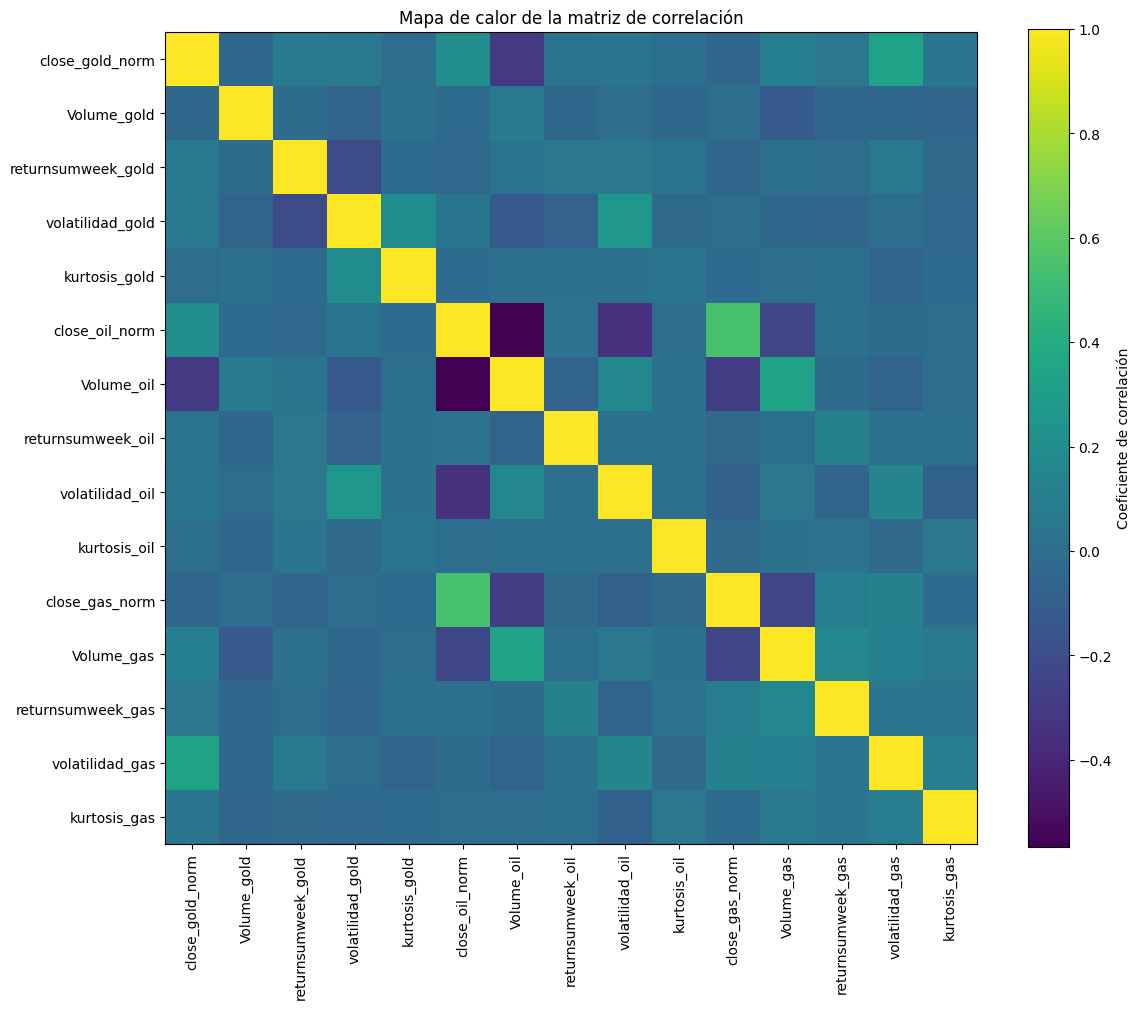


Top 20 parejas de variables con mayor correlación absoluta:

        Variable_1        Variable_2  Abs_Correlation
    close_oil_norm        Volume_oil         0.566871
    close_oil_norm    close_gas_norm         0.546551
    close_oil_norm   volatilidad_oil         0.344291
   close_gold_norm   volatilidad_gas         0.343161
        Volume_oil        Volume_gas         0.332994
   close_gold_norm        Volume_oil         0.299602
        Volume_oil    close_gas_norm         0.281270
  volatilidad_gold   volatilidad_oil         0.263800
    close_gas_norm        Volume_gas         0.237706
    close_oil_norm        Volume_gas         0.231756
returnsumweek_gold  volatilidad_gold         0.201547
   close_gold_norm    close_oil_norm         0.199722
  volatilidad_gold     kurtosis_gold         0.192995
        Volume_gas returnsumweek_gas         0.164978
        Volume_oil   volatilidad_oil         0.162160
   volatilidad_oil   volatilidad_gas         0.143470
  volatilidad_gold  

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar el CSV final y convertir "Date" a datetime
df = pd.read_csv('normalizados_volumen_metr_intrasemanal_organizado.csv', parse_dates=['Date'])

# 2. Seleccionar sólo columnas numéricas (descartar la columna de fecha)
numeric_df = df.drop(columns=['Date'])

# 3. Calcular matriz de correlación de Pearson
corr_matrix = numeric_df.corr()

# 4. Dibujar el mapa de calor
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, interpolation='nearest', cmap='viridis')
plt.colorbar(label='Coeficiente de correlación')
ticks = range(len(corr_matrix.columns))
plt.xticks(ticks, corr_matrix.columns, rotation=90)
plt.yticks(ticks, corr_matrix.columns)
plt.title('Mapa de calor de la matriz de correlación')
plt.tight_layout()
plt.show()

# 5. Preparar un DataFrame con todas las parejas y sus correlaciones absolutas
corr_pairs = (
    corr_matrix
    .abs()                      # Tomar valor absoluto
    .where(lambda x: x < 1)     # Eliminar la diagonal (auto-correlación)
    .stack()                    # Convertir a formato largo
    .reset_index()
)
corr_pairs.columns = ['Variable_1', 'Variable_2', 'Abs_Correlation']

# 6. Para evitar duplicados inversos (A-B y B-A), ordenamos cada tupla alfabéticamente
corr_pairs['Pair_Sorted'] = corr_pairs.apply(
    lambda row: tuple(sorted([row['Variable_1'], row['Variable_2']])),
    axis=1
)
corr_pairs = corr_pairs.drop_duplicates(subset=['Pair_Sorted'])

# 7. Ordenar de mayor a menor según la correlación absoluta y extraer el Top 20
top20 = (
    corr_pairs
    .sort_values(by='Abs_Correlation', ascending=False)
    .head(20)
    [['Variable_1', 'Variable_2', 'Abs_Correlation']]
)

# 8. Mostrar el Top 20 en pantalla
print("\nTop 20 parejas de variables con mayor correlación absoluta:\n")
print(top20.to_string(index=False))


Date
Esta columna indica el lunes que etiqueta cada semana. Se generó al reagrupar los datos diarios con resample('W-MON'), de modo que cada fila representa la semana cuyo primer día hábil es ese lunes. Por tanto, “Date” marca el inicio de la semana en la que se calcularon las métricas.

close_gold_norm
Mide el precio de cierre semanal promedio del oro, normalizado respecto al primer valor histórico semanal. Primero se tomó la media de todos los cierres diarios de la semana para obtener un “Close semanal”; a continuación, ese “Close semanal” se dividió por el cierre de la primera semana completa en la serie, de manera que la primera semana quede en 1 y las siguientes reflejen su evolución proporcional.

Volume_gold
Corresponde al volumen total de operaciones de oro en cada semana. Se calculó sumando todos los registros diarios de la columna “Volume” del CSV diario de oro para los días hábiles de esa semana. Este agregado indica cuánta actividad de trading concentró el mercado de oro durante esos cinco días.

returnsumweek_gold
Se refiere al retorno logarítmico acumulado del oro en la semana. Para ello, se calculó el retorno diario como ln(Closeₜ / Closeₜ₋₁) a partir de los precios de cierre diarios. Luego, se sumaron todos esos retornos de lunes a viernes, de modo que la suma de log‐retornos represente el retorno total de la semana.

volatilidad_gold
Representa la volatilidad semanal del oro, es decir, cuán dispersos estuvieron sus retornos diarios durante la semana. Se obtuvo tomando la serie de retornos logarítmicos diarios de esa semana y calculando la desviación estándar muestral (std(ddof=1)). De esta forma se cuantifica la inestabilidad intradía del oro en cada bloque semanal.

kurtosis_gold
Es la curtosis de los retornos diarios del oro en la semana, que mide cuán “pesadas” fueron las colas de su distribución de retornos semanales. Para obtenerla, se agruparon los retornos logarítmicos diarios de la semana y se aplicó la función pd.Series(...).kurtosis(). Un valor positivo indica colas más pesadas (movimientos extremos más frecuentes) y un valor negativo colas más ligeras.

close_oil_norm
Indica el precio de cierre semanal promedio del petróleo, normalizado en relación con el primer valor semanal. Primero se calculó la media de los cierres diarios de crudo a lo largo de la semana, y luego ese promedio se dividió por el cierre de la semana inicial de la serie. Así, la primera semana toma valor 1 y las posteriores muestran la evolución proporcional del precio del petróleo.

Volume_oil
Refleja el volumen total negociado de petróleo durante la semana. Para ello, se sumaron los volúmenes diarios registrados en la columna “Volume” del CSV diario de petróleo correspondientes a los días hábiles. De esta manera, se obtiene cuántos contratos o barriles se intercambiaron en cada semana.

returnsumweek_oil
Representa el retorno logarítmico acumulado del precio de cierre del petróleo en la semana. Se calcularon primero los retornos logarítmicos diarios (ln(Closeₜ / Closeₜ₋₁)) y, a continuación, se sumaron todos esos valores para la semana. Esa suma equivale al log‐retorno total de lunes a viernes en la semana correspondiente.

volatilidad_oil
Ofrece la volatilidad semanal del petróleo, definida como la desviación estándar de sus retornos logarítmicos diarios dentro de esa misma semana. A partir de la serie de retornos diarios, se aplicó std(ddof=1) para medir la dispersión de los movimientos de precio en cada bloque semanal.

kurtosis_oil
Es la curtosis de los retornos diarios del petróleo durante la semana, es decir, mide la presencia de movimientos extremos en la distribución semanal de retornos. Para calcularla, se partió de los retornos log diarios de crudo y se aplicó la función de curtosis de pandas (.kurtosis()) sobre ese conjunto semanal.

close_gas_norm
Indica el precio de cierre semanal promedio del gas, normalizado en relación con el primer valor de la serie. Se obtiene primero promediando todos los cierres diarios de gas en la semana y luego dividiendo ese valor por el cierre de gas de la primera semana completa. De ese modo, la primera fila vale 1 y las posteriores muestran la evolución proporcional del precio del gas.

Volume_gas
Corresponde al volumen total de operaciones de gas en cada semana. Para calcularlo, se sumaron los valores diarios de la columna “Volume” del CSV diario de gas de lunes a viernes. Así se refleja cuántas unidades (contratos, metros cúbicos, etc.) se negociaron durante esa semana.

returnsumweek_gas
Se refiere al retorno logarítmico acumulado del precio de cierre del gas en la semana. Primero se obtuvieron los retornos diarios como ln(Closeₜ / Closeₜ₋₁) y luego se sumaron todas esas cifras a lo largo de la semana para lograr el log‐retorno total del bloque semanal.

volatilidad_gas
Mide la volatilidad semanal del gas, esto es, la desviación estándar de sus retornos logarítmicos diarios durante la semana. A partir de la serie de retornos diarios de gas, se calculó std(ddof=1) para cuantificar cuánto se alejaron los precios de su media en días consecutivos dentro de esa semana.

kurtosis_gas
Es la curtosis de los retornos diariamente logarítmicos del gas en la semana, que indica la densidad de la cola (frecuencia de eventos extremos). Para ello, se tomó el conjunto de retornos diarios de la semana y se aplicó pd.Series(x).kurtosis(), de forma que un valor alto denote colas pesadas (movimientos bruscos más probables).